In [13]:
# Import modules.
import torch
import random

import numpy as np

from trainer import Trainer
from torch import nn, optim
from hyperparameters import *
from torchsummary import summary
from torch.utils.data import DataLoader
from network import Discriminator, Generator
from torchvision import datasets, transforms

In [2]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [3]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Set data transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [5]:
# Get dataset.
train_data = datasets.MNIST(
    root=dataset_path,
    train=True,
    download=True,
    transform=transform,
)

# Create data loader.
train_loader = DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
)

In [6]:
# Set model.
D_MODEL = Discriminator()
G_MODEL = Generator()

D_MODEL.to(device=device)
G_MODEL.to(device=device)

Generator(
  (block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
  )
  (conv1): ConvTranspose2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
  )
  (conv2): ConvTranspose2d(128, 128, kernel_size=(2

In [12]:
# Print model summary.
print("Discriminator model summary:")
summary(D_MODEL, input_size=(1, 28, 28))
print()

print("Generator model summary:")
summary(G_MODEL, input_size=(1, 7, 7))
print()

Discriminator model summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
         LeakyReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
         LeakyReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
        LeakyReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
        LeakyReLU-13          [-1, 128, 14, 14]               0
        Ma

In [8]:
# Set optimizer and loss function.
d_optimizer = optim.Adam(D_MODEL.parameters(), lr=learning_rate, betas=(beta1, beta2))
g_optimier = optim.Adam(G_MODEL.parameters(), lr=learning_rate, betas=(beta1, beta2))

d_loss_fn = nn.BCELoss()
g_loss_fn = nn.BCELoss()

Epoch: 0 | Time: 165.800 | D Loss: 0.310 | G Loss: 2.645                              


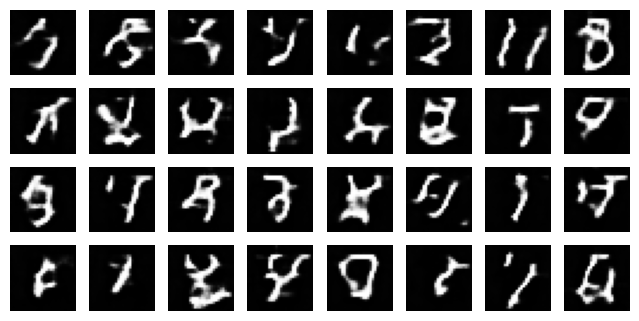

In [9]:
trainer = Trainer(data_loader=train_loader, batch_size=batch_size, z_dim=100, d_model=D_MODEL, g_model=G_MODEL, d_optimizer=d_optimizer, g_optimizer=g_optimier, d_loss_fn=d_loss_fn, g_loss_fn=g_loss_fn, device=device)
trainer.train(epochs=1, dg_ratio=2, test=True, test_num=32)

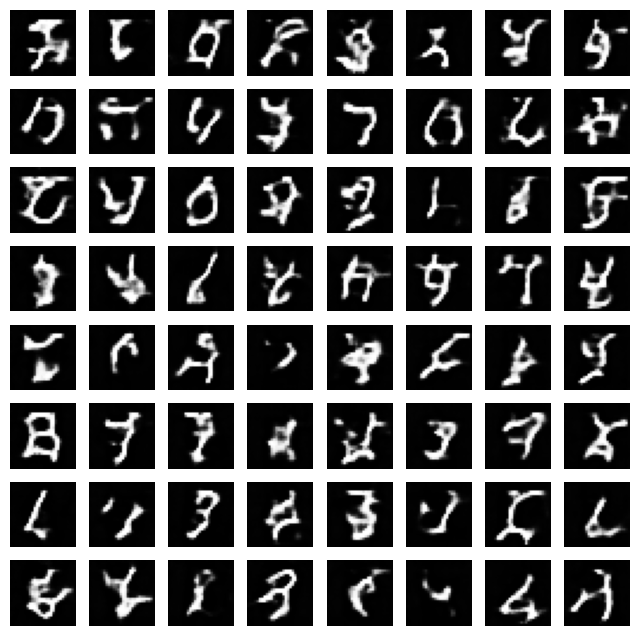

In [11]:
trainer.test(num=64)